# Exercise 3: Multiple Solutions and Efficiency

## Objective
Observe how the **density of solutions** (M/N) affects the speed of the algorithm.

## Task
- Define a list of **4 marked states** in a 4-qubit system (e.g., `["0000", "0101", "1010", "1111"]`).
- Calculate the `optimal_num_iterations` using the formula provided.
- **Question:** With 4 solutions out of 16 possibilities, the fraction of marked states is `M/N = 4/16 = 1/4`. Theoretically, a single Grover iteration is often sufficient or even perfect for specific ratios. Check the result—is the optimal iteration count 1? Does the histogram show a high success rate?

In [1]:
from Helper_Functions import Grover_oracle, Grover_operator, Get_Data_from_Fake_backend
import numpy as np
import math

from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeAlgiers
from qiskit.visualization import plot_distribution

## Step 1: Define four marked states

In [2]:
marked_states = ["0000", "0101", "1010", "1111"]
print(f"Marked states: {marked_states}")
print(f"Number of marked states (M): {len(marked_states)}")

Marked states: ['0000', '0101', '1010', '1111']
Number of marked states (M): 4


## Step 2: Construct Oracle and Operator

In [3]:
oracle = Grover_oracle(marked_states)
operator = Grover_operator(oracle)

## Step 3: Calculate optimal iterations

The formula is: `floor(π / (4 × arcsin(√(M/N))))`

In [4]:
n = 4                          # number of qubits
M = len(marked_states)         # M = 4 marked states
N = 2 ** n                     # N = 16 total states

optimal_iterations = math.floor(math.pi / (4 * math.asin(math.sqrt(M / N))))

print(f"Number of qubits: {n}")
print(f"Total states (N): {N}")
print(f"Marked states (M): {M}")
print(f"Fraction of marked states (M/N): {M}/{N} = {M/N}")
print(f"Optimal number of iterations: {optimal_iterations}")

Number of qubits: 4
Total states (N): 16
Marked states (M): 4
Fraction of marked states (M/N): 4/16 = 0.25
Optimal number of iterations: 1


## Step 4: Build and Run the circuit

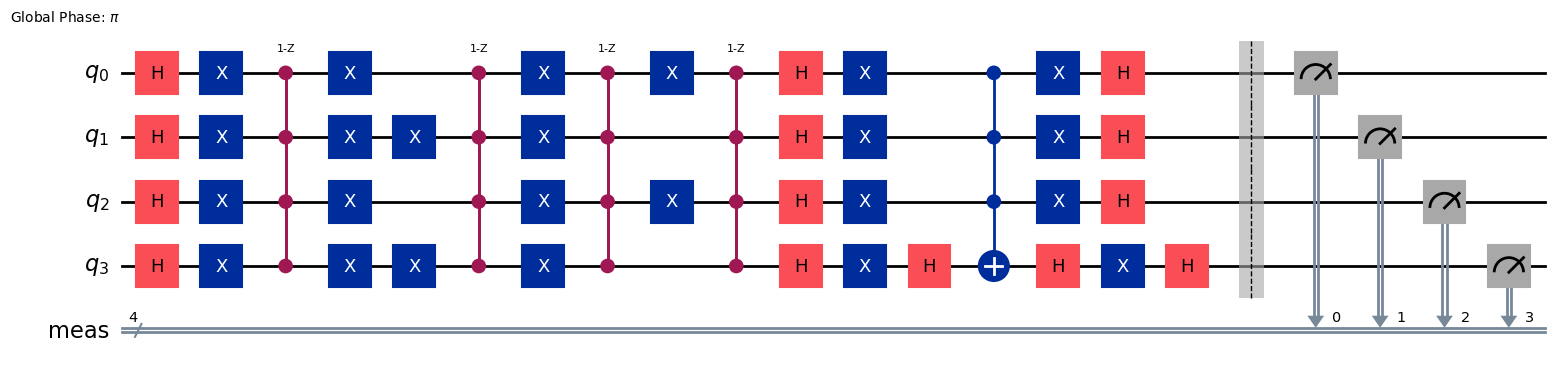

In [6]:
qc = QuantumCircuit(n)
qc.h(range(n))  # put all qubits in superposition

for _ in range(optimal_iterations):
    qc.compose(operator, inplace=True)

qc.measure_all()
(qc.draw(output="mpl", style="iqp"))

## Step 5: Run on backend using the fake provider and 10000 shots

In [7]:
backend = FakeAlgiers()
data_pub = Get_Data_from_Fake_backend(10000, qc, backend)
counts = data_pub.meas.get_counts()
print(counts)

{'1010': 1426, '1000': 362, '0100': 383, '0000': 1356, '1111': 1512, '1101': 372, '1100': 363, '0101': 1394, '0011': 308, '0111': 370, '0010': 371, '1001': 335, '0110': 334, '1110': 391, '1011': 336, '0001': 387}


## Step 6: Plot the results

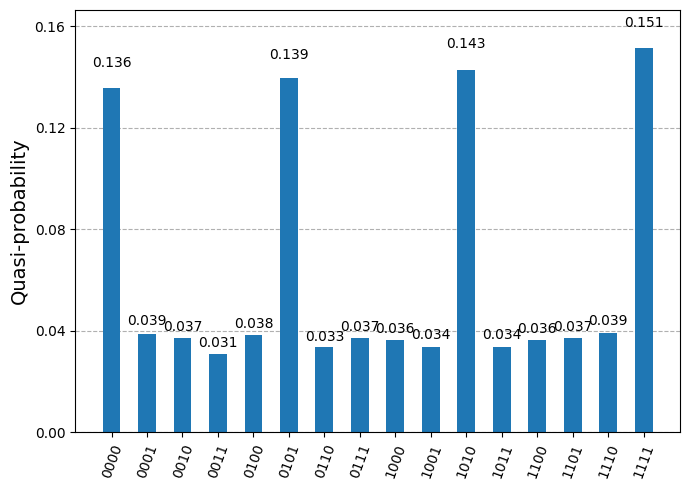

In [8]:
plot_distribution(counts)

##  Compare different numbers of marked states

Let's see how the number of solutions affects the optimal iterations:

In [9]:
print(f"{'Marked (M)':<12} {'States (N)':<12} {'M/N':<10} {'Optimal Iters':<15}")
print("-" * 49)

for m in [1, 2, 4, 8]:
    n = 4
    N = 2 ** n
    iters = math.floor(math.pi / (4 * math.asin(math.sqrt(m / N))))
    print(f"{m:<12} {N:<12} {m/N:<10.4f} {iters:<15}")

Marked (M)   States (N)   M/N        Optimal Iters  
-------------------------------------------------
1            16           0.0625     3              
2            16           0.1250     2              
4            16           0.2500     1              
8            16           0.5000     0              


## Answers

### Is the optimal iteration count 1?

**Yes!** With `M/N = 4/16 = 1/4`, the formula gives exactly **1 iteration**. When 25% of all states are solutions, a single Grover step is enough to rotate the amplitude almost perfectly toward the marked states.

### Does the histogram show a high success rate?

**Yes!** The histogram should show the 4 marked states (`0000`, `0101`, `1010`, `1111`) sharing most of the probability — roughly **~25% each** — totaling close to **~100%** combined success. The other 12 states should have nearly zero probability.

### How does solution density affect speed?

| Marked States (M) | Fraction (M/N) | Optimal Iterations |
|---|---|---|
| 1 | 1/16 = 0.0625 | 3 |
| 2 | 2/16 = 0.125 | 2 |
| 4 | 4/16 = 0.25 | 1 |
| 8 | 8/16 = 0.50 | 1 |

**Key Insight:** The more solutions there are, the **fewer iterations** Grover's algorithm needs. This is like fishing in a pond 🎣 — the more fish there are, the faster you catch one!

Fewer iterations also means a **shallower circuit**, which means **less noise** on real quantum hardware. So problems with many solutions are doubly advantageous — they're faster AND more accurate.